<a href="https://colab.research.google.com/github/LukeZingg/MAT421/blob/main/Module_H2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**22.4 - Numerical Error and Instability**



*   When solving ODEs with integration schemes, two main things matter: accuracy and stability.
*   Accuracy is how close the method gets to the true solution (which is usually unknown).
*   Accuracy depends on the step size h; smaller steps usually give better accuracy.
*   Stability is about whether the error stays small as the method moves forward in time.
*   A method is stable if the error doesn’t grow over time.
*   A method is unstable if the error grows over time.
*   Some methods are only stable for certain values of h — otherwise, they become unstable.

We can visualize this stability problem over time for different numerical methods of approximation:

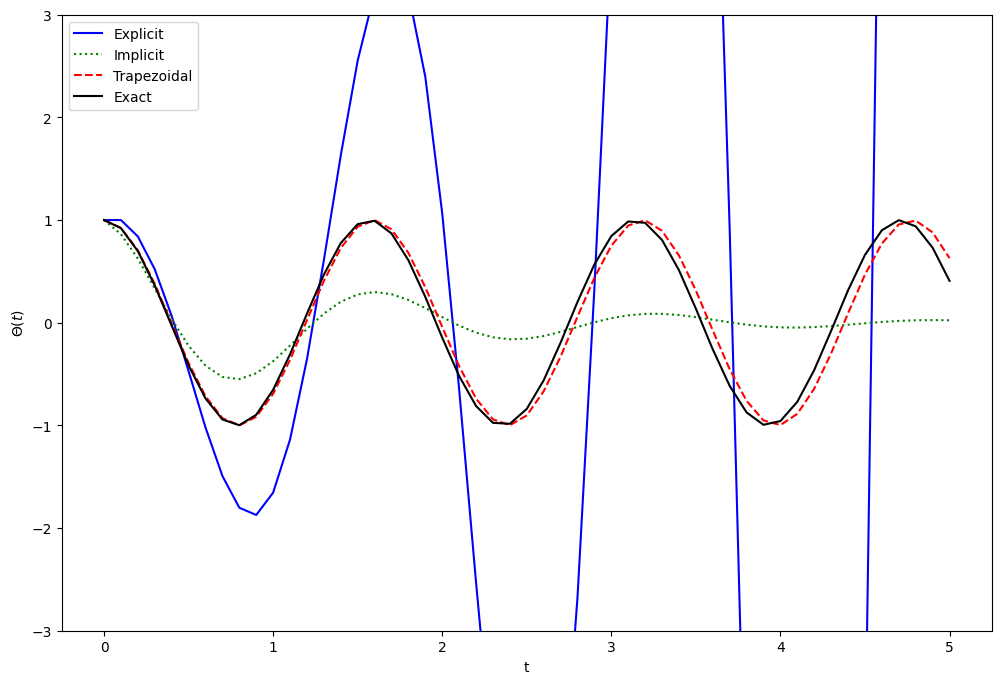

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

%matplotlib inline

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**22.5 - Predictor-Corrector and Runga Kutta Methods**

Predictor-Corrector:
*   
Predictor-corrector methods improve accuracy by evaluating the function F(t, S) at multiple points.
*   They combine these evaluations using a weighted average to update the state.
*   The method uses two steps: a predictor (initial estimate) and a corrector (refined update).

Runga Kutta:
*   Runge-Kutta methods solve ODEs by combining multiple evaluations of the function F(t, S) in each step.
*   They are based on truncated Taylor series to improve accuracy without needing derivatives.
*   RK methods (like RK4) are more accurate than Euler methods and widely used in practice.

**22.6 - Python ODE Solvers**

Python's package scipy contains several built-in functions for solving initial value problems. The most common of these is the scipy.integrate.solve_ivp function, though there are other options.

We can visualize these solvers in action.

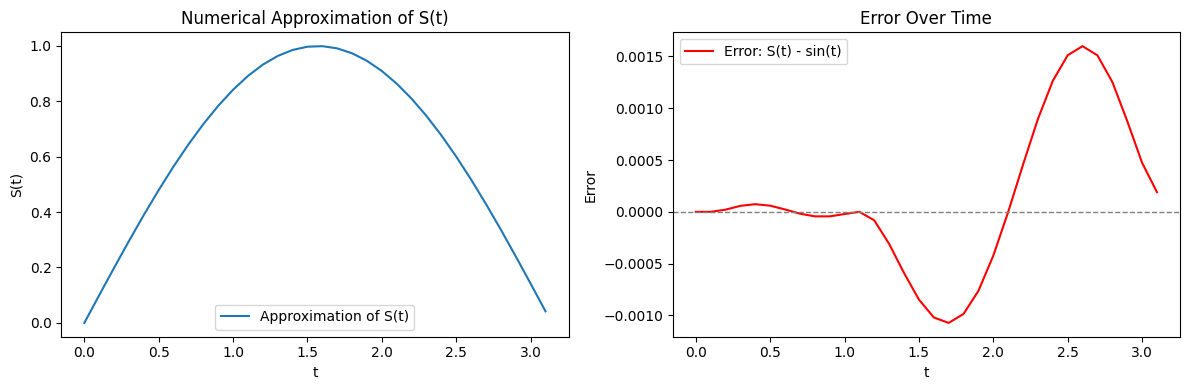

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))

# Left: Approximation of S(t)
plt.subplot(121)
plt.plot(sol.t, sol.y[0], label='Approximation of S(t)')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Numerical Approximation of S(t)')
plt.legend()

# Right: Error over time
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t), label='Error: S(t) - sin(t)', color='red')
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Error Over Time')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()

plt.tight_layout()
plt.show()

We can visualize the same thing happening for approximating an exponential function:

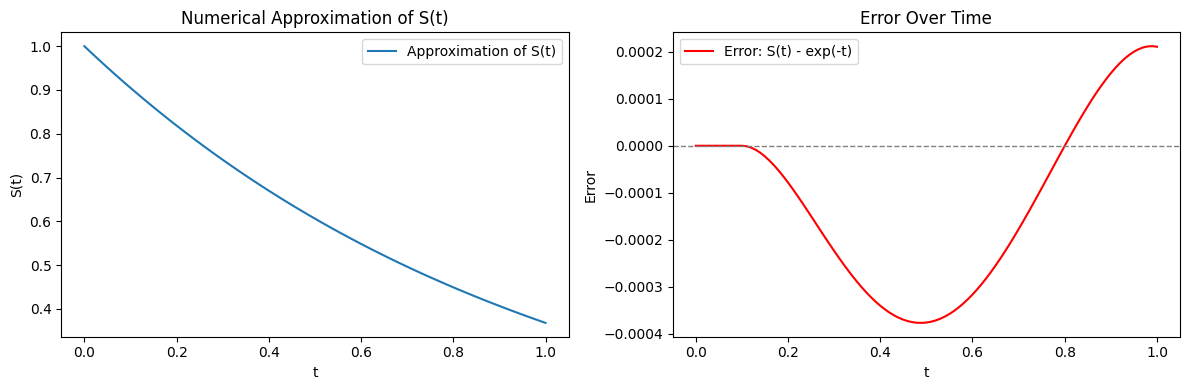

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))

# Left: Approximation of S(t)
plt.subplot(121)
plt.plot(sol.t, sol.y[0], label='Approximation of S(t)')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Numerical Approximation of S(t)')
plt.legend()

# Right: Error over time
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t), label='Error: S(t) - exp(-t)', color='red')
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Error Over Time')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()

plt.tight_layout()
plt.show()